# Insurance Premium Charge Prediction using Multiple Linear Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

## Data cleaning

### 1. Check datatype of each column 

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 2. Check for duplicates

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
data.duplicated().sum()
# there occurs one duplicate row 

1

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.duplicated().sum()
# One duplicate row removed

0

### 3. Check for null values 

In [10]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()
# there is no null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 4.Check for missing values

In [12]:
data.isna().sum()
# no missing values found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 5. Check for Outliers

In [13]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Data Preprocessing

### 6. Encode categorical variables

In [14]:
label_encoder= LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
data['smoker']= label_encoder.fit_transform(data['smoker'])
data['region']= label_encoder.fit_transform(data['region'])

### 7. Define the dependent and independent variables

In [15]:
X= data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [16]:
X.to_csv('insu.csv')

In [17]:
y= data['charges']


In [18]:
y.to_csv('outpu.csv')

### 8. Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 

In [20]:
X_train.shape # 2D array

(1069, 6)

In [21]:
y_train.shape # 1D array

(1069,)

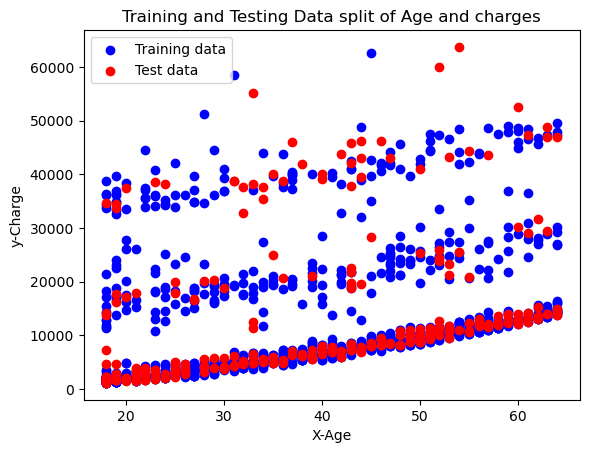

In [22]:
plt.scatter(X_train['age'], y_train, color='blue', label ='Training data')
plt.scatter(X_test['age'], y_test, color = 'red', label ='Test data')
plt.xlabel('X-Age')
plt.ylabel('y-Charge')
plt.title('Training and Testing Data split of Age and charges')
plt.legend()
plt.show()

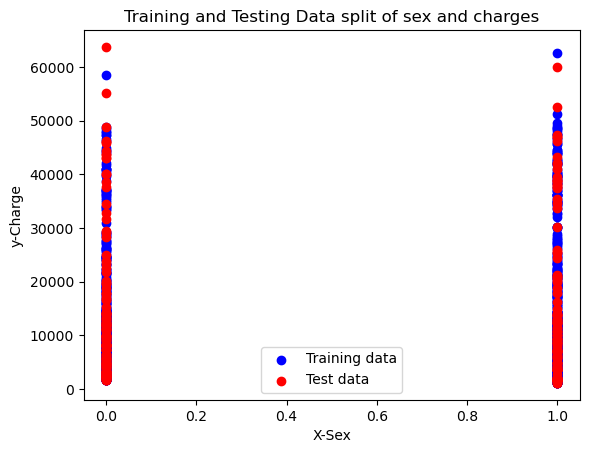

In [23]:
plt.scatter(X_train['sex'], y_train, color='blue', label ='Training data')
plt.scatter(X_test['sex'], y_test, color = 'red', label ='Test data')
plt.xlabel('X-Sex')
plt.ylabel('y-Charge')
plt.title('Training and Testing Data split of sex and charges')
plt.legend()
plt.show()

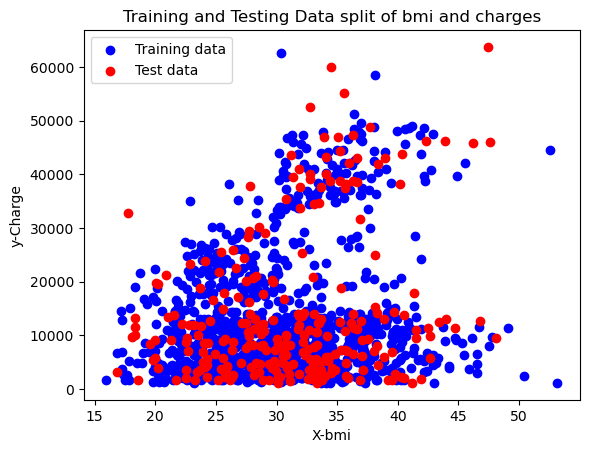

In [24]:
plt.scatter(X_train['bmi'], y_train, color='blue', label ='Training data')
plt.scatter(X_test['bmi'], y_test, color = 'red', label ='Test data')
plt.xlabel('X-bmi')
plt.ylabel('y-Charge')
plt.title('Training and Testing Data split of bmi and charges')
plt.legend()
plt.show()

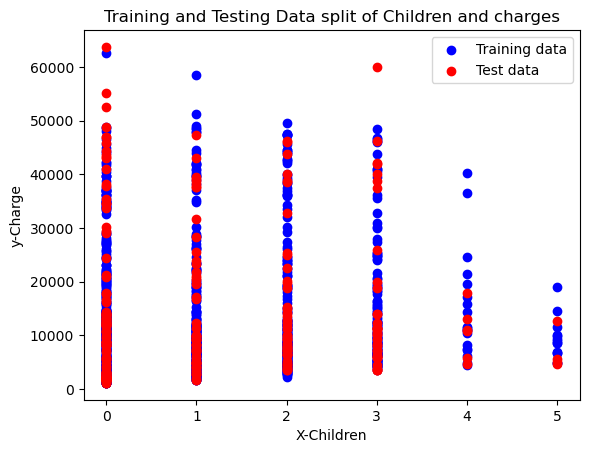

In [25]:
plt.scatter(X_train['children'], y_train, color='blue', label ='Training data')
plt.scatter(X_test['children'], y_test, color = 'red', label ='Test data')
plt.xlabel('X-Children')
plt.ylabel('y-Charge')
plt.title('Training and Testing Data split of Children and charges')
plt.legend()
plt.show()

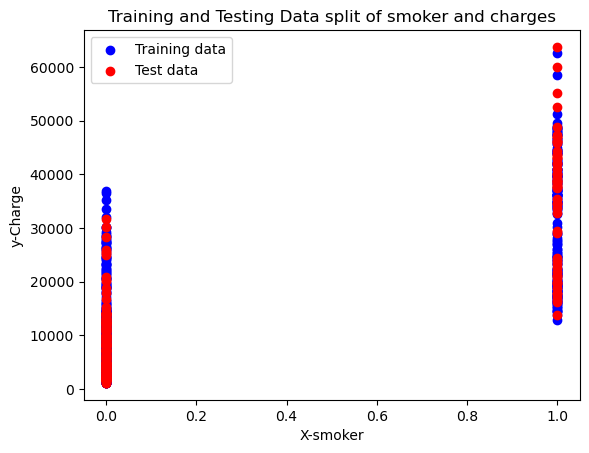

In [26]:
plt.scatter(X_train['smoker'], y_train, color='blue', label ='Training data')
plt.scatter(X_test['smoker'], y_test, color = 'red', label ='Test data')
plt.xlabel('X-smoker')
plt.ylabel('y-Charge')
plt.title('Training and Testing Data split of smoker and charges')
plt.legend()
plt.show()

### 9. Create and train the regression model

In [27]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 10. Make predictions


In [28]:
y_pred= model.predict(X_test)

### 11. Evaluate the model

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
mse

35493102.61165053

In [31]:
r2

0.8068466322629111

In [32]:
## To visualize the results of a multiple regression, we often focus on plotting predicted vs actual values, 
## plotting the residuals (the differences between the observed and predicted values),plotting partial regression plots 
##  to check the assumptions of linear regression. 
## Since we have multiple independent variables, a simple 2D plot of the regression line like in simple linear
## regression isn't possible.

### 12. Plotting Predicted vs Actual Values:

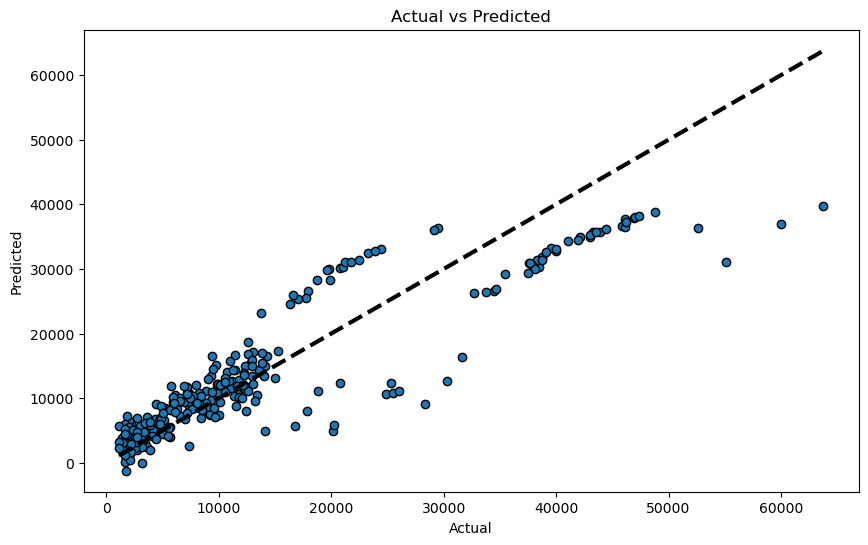

In [33]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### Interpretation from the plot
 R2 score of 0.80 suggests that there is a strong correlation between the actual insurance charges (y_test) and the predicted insurance charges (y_pred). This means that the model has captured a significant portion of the relationship between the independent variables (e.g., age, BMI, smoking status) and the dependent variable (insurance charges).

### 13. Plotting Residuals

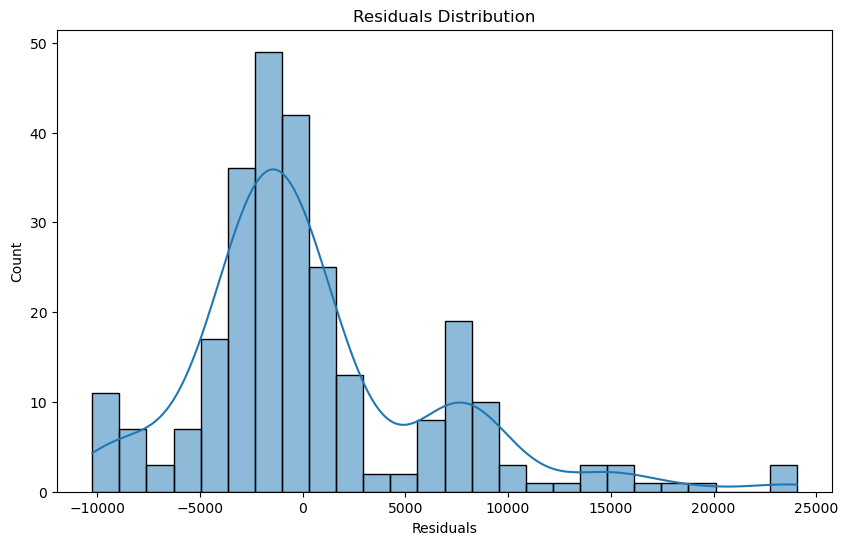

In [34]:
# This helps to check the distribution of residuals to ensure they are normally distributed.
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

#### Interpretation from the histogram of residual
Peak at Zero Residual signifies most of the predictions are close to the actual values, indicating a generally good model fit.
Ideally, residuals should be randomly scattered around zero without any discernible pattern. Patterns could indicate issues like non-linearity or heteroscedasticity.

### 14. Partial Regression Plots:

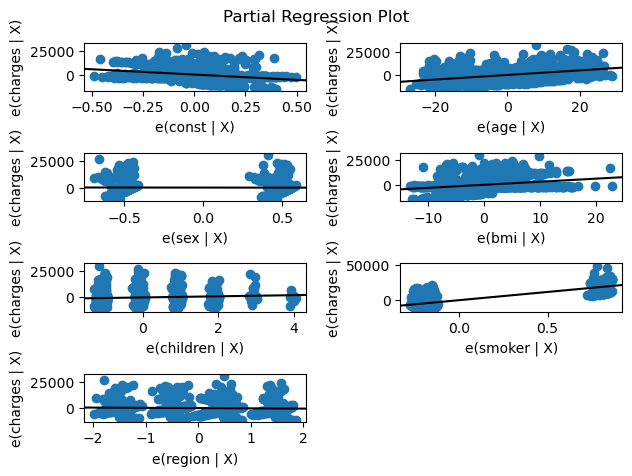

In [35]:
# This helps to visualize the relationship between each independent variable and 
# the dependent variable while holding the other variables constant.
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_with_const).fit()
fig = sm.graphics.plot_partregress_grid(sm_model)
fig.tight_layout(pad=1.0)
plt.show()

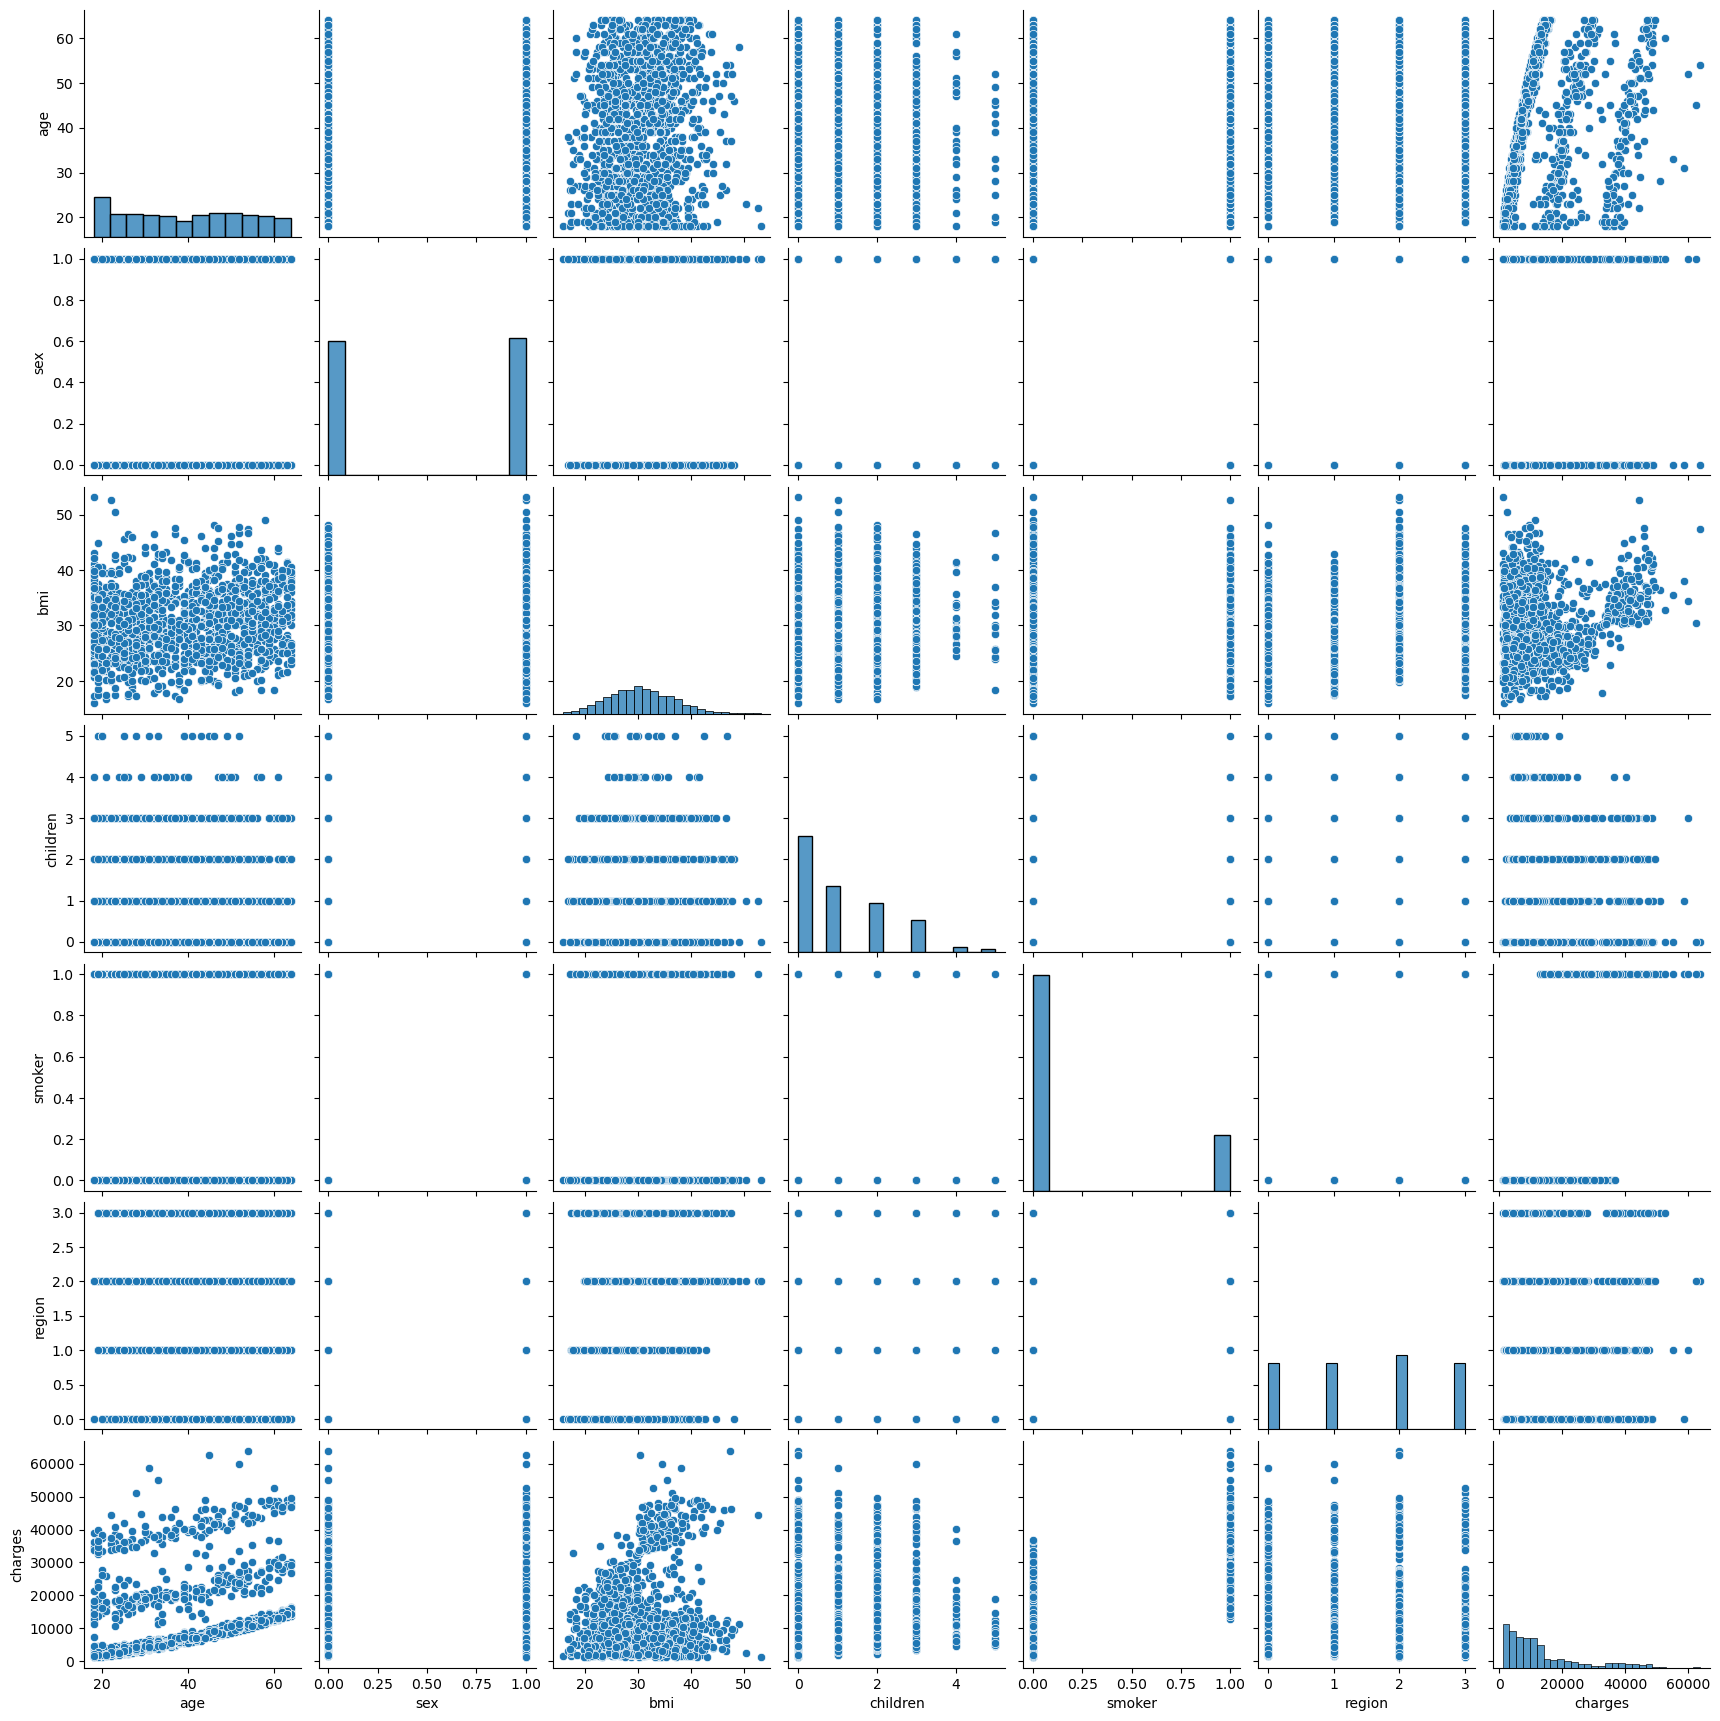

In [36]:
#### The pair plot will help visualize how each feature relates to the charges.
sns.pairplot(data)
plt.show()

### 15.R2 computation for each independent variable with the dependent variable

In [37]:
X.shape

(1337, 6)

In [38]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [39]:
independent_variables= X 
r2_scores = {}

In [40]:
for var in independent_variables:
    X = data[[var]].values.reshape(-1, 1) # to extract specific column values (ie.independent variable) as a dataframe 
    # and reshaped to 2D array 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores[var] = r2

# Display the R^2 scores
for var, score in r2_scores.items():
    print(f'R-squared for {var} with charges: {score}')

R-squared for age with charges: 0.09513000782072023
R-squared for sex with charges: -0.0059343865026528775
R-squared for bmi with charges: 0.05172261154295266
R-squared for children with charges: -0.013367948483225867
R-squared for smoker with charges: 0.6732662703492573
R-squared for region with charges: -0.008374849983498578


In [41]:
r2_scores

{'age': 0.09513000782072023,
 'sex': -0.0059343865026528775,
 'bmi': 0.05172261154295266,
 'children': -0.013367948483225867,
 'smoker': 0.6732662703492573,
 'region': -0.008374849983498578}

In [42]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


 ### Interpretation from the correlation matrix
 Value: The correlation coefficient of 0.78 between smoker and charges.
 Interpretation: This indicates a strong positive correlation. 
 Being a smoker is strongly associated with higher insurance charges. 
As the value is relatively close to 1, it suggests that smoking status 
 is a significant factor in determining insurance charges. In practical terms, 
smokers are likely to have higher insurance charges compared to non-smokers.

Value: The correlation coefficient of 0.29 between age and charges.
Interpretation: This indicates a weak positive correlation. Age has a relatively 
small positive association with insurance charges. While there is a slight 
tendency for insurance charges to increase with age, the relationship is not very strong. 
This means that other factors besides age might be playing a more significant role in determining insurance charges.

### Insights and Practical Implications:
**Smoking Status**: As the strongest predictor, smoking status has a profound impact on insurance charges. Insurers often charge higher premiums to smokers due to the elevated health risks.  

**Age**: While age shows a weaker correlation, it still contributes to the model. Older individuals might face slightly higher charges, but other factors play a more significant role.  

**BMI**: Although BMI has a weaker correlation with insurance charges, it remains an important factor due to the health risks associated with higher BMI values.

**Number of Children**: Family size has a minor impact, suggesting slight cost adjustments for larger families.  

**Sex and Region**: These variables have varying effects, often less influential individually but important when combined with other factors.

### Conclusion:
Understanding the behavior of these independent variables helps in creating accurate 
predictive models for insurance charges. By leveraging Multiple Linear Regression, 
we can identify key factors that influence costs and make data-driven decisions to optimize pricing strategies. 
This approach not only improves accuracy but also provides valuable insights into the factors driving insurance 
costs, ultimately benefiting both insurers and policyholders.